In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
p='E:/Onedrive - Lancaster University/Datarepo/szekelydata/klima/'

In [3]:
stations=pd.read_csv(p+'stations.csv')
stations=stations.set_index('ID')
stations.to_csv('data/stations.csv')

0: NoCloud
1: Cloud
4: Fog
6: Rain
7: Snow
11: Hail

In [4]:
weather={
2:1,
3:7,
5:6,
8:6,
9:6,
100:0,
101:0,
102:0,
103:0,
104:0,
105:0,
106:0,
107:0,
108:0,
109:0,
110:4,
111:4,
112:4,
113:1,
114:6,
115:6,
116:6,
117:6,
118:6,
119:1,
120:7,
121:6,
122:7,
123:6,
124:11,
125:6,
126:7,
127:11,
128:4,
129:6,
130:1,
131:1,
132:1,
133:1,
134:1,
135:1,
136:7,
137:7,
138:7,
139:7,
140:4,
141:4,
142:4,
143:4,
144:4,
145:4,
146:4,
147:4,
148:4,
149:4,
150:6,
151:6,
152:6,
153:6,
154:6,
155:6,
156:6,
157:6,
158:6,
159:6,
160:6,
161:6,
162:6,
163:6,
164:6,
165:6,
166:11,
167:11,
168:6,
169:6,
170:7,
171:7,
172:7,
173:7,
174:7,
175:7,
176:7,
177:7,
178:7,
179:7,
180:6,
181:6,
182:6,
183:7,
184:7,
185:7,
186:7,
187:7,
188:7,
189:11,
190:11,
191:6,
192:6,
193:7,
194:7,
195:6,
196:11,
197:6,
198:1,
199:11}

In [5]:
measures=['XTEMP','XSPD','XPCP','XSD','XVSB','YFOG','YPCP','YSNW','YHAL']
ycolumns={1:'YCLD',4:'YFOG',6:'YPCP',7:'YSNW',10:'YCLR',11:'YHAL'}

In [6]:
def load_data(stn,d='high_res',p=p,stations=stations,verbose=True):
    if verbose:
        print('loading...',stn,stations.loc[int(stn)]['LOC'],d)
    df=pd.read_csv(p+'/'+d+'/export/'+stn+'.csv',dtype={' FRSHTT':str})
    df.columns=[i.strip() for i in df.columns]
    df['time']=pd.to_datetime(df['time'])
    df['XTEMP']=(pd.to_numeric(df['TEMP'], errors='coerce').replace(9999.9,np.nan)-32)*5/9 #Fahrenheit to Celsiu
    if d=='high_res':
        df['XSPD']=pd.to_numeric(df['SPD'], errors='coerce')*1.61 #MPH to Km/h
        df['XVSB']=(pd.to_numeric(df['VSB'], errors='coerce')*1.61).apply(lambda x: min(x,10)) #miles to Km, max VSB=20Km
        df['XPCP']=pd.to_numeric(df['PCP06'], errors='coerce')*25.4 #inch to mm
        df['XSD']=pd.to_numeric(df['SD'], errors='coerce')*25.4 #inch to mm
        
        df['PCP01']=pd.to_numeric(df['PCP01'], errors='coerce')
        df['PCP06']=pd.to_numeric(df['PCP06'], errors='coerce')
        df['PCP24']=pd.to_numeric(df['PCP24'], errors='coerce')
        df['PCPXX']=pd.to_numeric(df['PCPXX'], errors='coerce')
        df['PCP06'].loc[~df['PCP06'].isnull()] = 6
        df['PCPXX'].loc[~df['PCPXX'].isnull()] = 6
        df['PCP01'].loc[~df['PCP01'].isnull()] = 6
        df['PCP24'].loc[~df['PCP24'].isnull()] = 6
        df['AW']=pd.to_numeric(df['AW'], errors='coerce')+100
        df['MW']=pd.to_numeric(df['MW'], errors='coerce')+100
        df['W']=pd.to_numeric(df['W'], errors='coerce')
        dz=df[['PCP01','PCP06','PCP24','PCPXX','AW','MW','W']]
        df['W']=dz.ffill(axis=1)['W'].replace(weather).replace(0,10)
        dz=df.groupby(['time','W']).count()['TEMP'].unstack().fillna(0)
        dz.columns=[ycolumns[i] for i in dz.columns]
        df=df.set_index('time').join(dz).reset_index()
    else:
        df['year']=df['time'].dt.year
        df['month']=df['time'].dt.month
        df['day']=df['time'].dt.day
        df['hour']=df['time'].dt.hour
        df['XSPD']=pd.to_numeric(df['WDSP'], errors='coerce').replace(999.9,np.nan)*1.85 #knots to Km/h
        df['XVSB']=(pd.to_numeric(df['VISIB'], errors='coerce').replace(999.9,np.nan)*1.61).apply(lambda x: min(x,10)) #miles to Km, max VSB=20Km
        df['XPCP']=pd.to_numeric(df['PRCP'].str[:-1], errors='coerce').replace(99.99,np.nan)*25.4 #inch to mm
        df['XSD']=pd.to_numeric(df['SNDP'], errors='coerce').replace(999.9,np.nan)*25.4 #inch to mm
        
        df['YFOG']=pd.to_numeric(df['FRSHTT'].str[0], errors='coerce')
        df['YPCP']=pd.to_numeric(df['FRSHTT'].str[1], errors='coerce')
        df['YSNW']=pd.to_numeric(df['FRSHTT'].str[2], errors='coerce')
        df['YHAL']=pd.to_numeric(df['FRSHTT'].str[3], errors='coerce')
    for m in measures:
        if m not in df.columns:
            df[m]=np.nan
    return df[['time','year','month','day','hour']+measures].set_index('time')

In [353]:
# stn='154200' #aurel vlaicu
stn='151700' #mciuc
# stn='128390' #bp
# stn='128510' #kekes
# stn='151200' #kv
# stn='152800' #omu
daily=load_data(stn,'daily')
hires=load_data(stn,'high_res')

loading... 151700 MIERCUREA CIUC daily
loading... 151700 MIERCUREA CIUC high_res


In [354]:
df=hires[hires['month']>8]
dz=df[df['XSD']>20].reset_index().groupby('year').min()[['time']]
dz=dz.T
dz[2019]=pd.to_datetime('2019-10-31')
dz=dz.T
dz['month']=dz['time'].dt.month
dz['day']=dz['time'].dt.day
dz['d']=pd.to_datetime(dict(year='2019', month=dz['month'], day=dz['day'])).values
dk2=dz['d']

In [357]:
df=daily[daily['month']>8]
dz=df[df['XSD']>20].reset_index().groupby('year').min()[['time']]
dz=dz.T
dz[2019]=pd.to_datetime('2019-10-31')
dz=dz.T
dz['month']=dz['time'].dt.month
dz['day']=dz['time'].dt.day
dz['d']=pd.to_datetime(dict(year='2019', month=dz['month'], day=dz['day'])).values
dk1=dz['d']

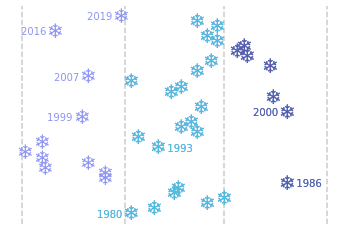

In [358]:
fig,ax=plt.subplots(1,1)
colors=['#cccccc','#8E94F2','#4BC0D9','#6457A6','#8E94F2','#4BC0D9','#6457A6','#8E94F2','#4BC0D9','#6457A6']
dates=['2019-10','2019-11','2019-12','2020-01']
months=['október','november','december']
for i in range(1,len(dates)):
    a1=dk1[dk1<dates[i]]
    a1=dk1[dk1>dates[i-1]]
    ax.scatter(a1.values,a1.index,s=0,color=colors[i],alpha=0.3)
#     a1=dk2[dk2<dates[i]]
#     a1=dk2[dk2>dates[i-1]]
#     ax.scatter(a1.values,a1.index,s=50,marker='x',color=colors[i],alpha=0.3)
    x=a1.values
    y=a1.index
    for j in range(len(x)):
        ax.text(x[j],y[j],'❄️',fontsize=20,color=colors[i],verticalalignment='center',horizontalalignment='center')
        if y[j] in [2000,2019,1980,1999,2007,2016]:
            ax.text(x[j],y[j],str(y[j])+'   ',fontsize=10,color=colors[i],verticalalignment='center',horizontalalignment='right')
        if y[j] in [1986,1993,1978]:
#         if True:
            ax.text(x[j],y[j],'   '+str(y[j]),fontsize=10,color=colors[i],verticalalignment='center',horizontalalignment='left')
for a in dates:
    ax.axvline(a,ls='--',c=colors[0])
ax.axis('off')
plt.savefig(stn+'elsoho.png',dpi=300,transparent=True)
plt.show()